In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import metrics
from sklearn import tree

### 실습 과제 1. 데이터 불러온 후 종속변수 데이터 타입 변경, train_data : test_data = 8:2 split, random_state=1000
#### 종속변수는 'class', 독립변수는 나머지 변수

In [3]:
df = pd.read_csv("./data/Hepatitis.csv")

df

,age,sex,steriod,antivirals,fatigue,mamaise,anorexia,liver big,liver firm,spleen palpable,spiders,ascites,varices,bilirubin,alk phosphate,sgot,albumin,protime,histology,class
0,39,1,1,1,1,1,2,2,1,2,2,2,2,2.3,280,98,3.8,40,1,1
1,59,1,1,2,1,1,2,2,1,1,1,2,2,1.5,107,157,3.6,38,2,1
2,47,1,2,2,2,2,2,2,2,2,1,2,1,2.0,84,23,4.2,66,2,1
3,48,1,1,2,1,1,2,2,1,2,1,1,1,4.8,123,157,2.7,31,2,1
4,47,1,2,2,1,1,2,2,1,2,2,1,1,1.7,86,20,2.1,46,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,25,1,2,2,1,2,2,1,1,1,1,1,1,1.3,181,181,4.5,57,2,2
76,38,1,2,2,2,2,2,2,1,2,1,2,1,1.6,130,140,3.5,56,2,2
77,45,1,2,1,2,2,2,2,2,2,2,2,2,1.3,85,44,4.2,85,2,2
78,31,1,1,2,1,2,2,2,2,2,2,2,2,1.2,75,173,4.2,54,2,2


In [4]:
df.describe(include="all")

,age,sex,steriod,antivirals,fatigue,mamaise,anorexia,liver big,liver firm,spleen palpable,spiders,ascites,varices,bilirubin,alk phosphate,sgot,albumin,protime,histology,class
count,80.00000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.00000,80.000000
mean,40.66250,1.137500,1.525000,1.737500,1.350000,1.612500,1.850000,1.837500,1.525000,1.812500,1.687500,1.850000,1.875000,1.221250,102.912500,82.025000,3.843750,62.512500,1.41250,1.837500
std,11.28003,0.346547,0.502525,0.442769,0.479979,0.490253,0.359324,0.371236,0.502525,0.392775,0.466437,0.359324,0.332805,0.875213,53.684779,71.599974,0.576292,23.427774,0.49539,0.371236
min,20.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.300000,26.000000,14.000000,2.100000,0.000000,1.00000,1.000000
25%,32.00000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,2.000000,1.000000,2.000000,2.000000,0.700000,68.250000,30.750000,3.500000,46.000000,1.00000,2.000000
50%,38.50000,1.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,85.000000,56.500000,4.000000,62.000000,1.00000,2.000000
75%,49.25000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.300000,133.500000,102.750000,4.200000,77.250000,2.00000,2.000000
max,72.00000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,4.800000,280.000000,420.000000,5.000000,100.000000,2.00000,2.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              80 non-null     int64  
 1   sex              80 non-null     int64  
 2   steriod          80 non-null     int64  
 3   antivirals       80 non-null     int64  
 4   fatigue          80 non-null     int64  
 5   mamaise          80 non-null     int64  
 6   anorexia         80 non-null     int64  
 7   liver big        80 non-null     int64  
 8   liver firm       80 non-null     int64  
 9   spleen palpable  80 non-null     int64  
 10  spiders          80 non-null     int64  
 11  ascites          80 non-null     int64  
 12  varices          80 non-null     int64  
 13  bilirubin        80 non-null     float64
 14  alk phosphate    80 non-null     int64  
 15  sgot             80 non-null     int64  
 16  albumin          80 non-null     float64
 17  protime          8

In [6]:
df["class"].value_counts()

2    67
1    13
Name: class, dtype: int64

In [7]:
df["class"] = df["class"].replace(2, "normal")
df["class"] = df["class"].replace(1, "infection")
df["class"].value_counts()

normal       67
infection    13
Name: class, dtype: int64

In [8]:
from sklearn.model_selection import train_test_split

X = df.drop(labels="class", axis=1)
Y = df["class"]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1000)
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(64, 19) (16, 19) (64,) (16,)


### 실습2: 5-fold cross validation을 이용해 최적의 하이퍼파라미터를 구하고, test set에 대한 최적 모델의 예측 정확도 구하기
####  하이퍼 파라미터 : max_depth:[2,4,6], min_samples_split: [2,3,4]

In [9]:
decision_tree = tree.DecisionTreeClassifier()
# decision_tree.fit(X_train, Y_train)

In [10]:
from sklearn.model_selection import GridSearchCV

hyperparameters = {"max_depth":[2, 4, 6], "min_samples_split":[2, 3, 4]}

grid_search_cv = GridSearchCV(decision_tree, param_grid=hyperparameters, cv=5, scoring="accuracy", return_train_score=True)
grid_search_cv.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [2, 4, 6],
                         'min_samples_split': [2, 3, 4]},
             return_train_score=True, scoring='accuracy')

In [11]:
cv_results_df = pd.DataFrame(grid_search_cv.cv_results_)

cv_results_df[["param_max_depth", "param_min_samples_split", "mean_test_score", "mean_train_score"]]

,param_max_depth,param_min_samples_split,mean_test_score,mean_train_score
0,2,2,0.780769,0.953092
1,2,3,0.811538,0.953092
2,2,4,0.829487,0.953092
3,4,2,0.812821,0.996154
4,4,3,0.812821,0.992232
5,4,4,0.748718,0.988311
6,6,2,0.779487,1.000000
7,6,3,0.798718,0.996078
8,6,4,0.764103,0.988311


In [12]:
print(f"최고 평균 정확도: {grid_search_cv.best_score_}\n최적의 하이퍼 파라미터: {grid_search_cv.best_params_}")

최고 평균 정확도: 0.8294871794871795
최적의 하이퍼 파라미터: {'max_depth': 2, 'min_samples_split': 4}


In [13]:
best_decision_tree = grid_search_cv.best_estimator_
best_Y_pred = best_decision_tree.predict(X_test)
best_accuracy = metrics.accuracy_score(Y_test, best_Y_pred)

print("best 예측 정확도 :", best_accuracy)

best 예측 정확도 : 0.875


In [14]:
confusion_matrix = metrics.confusion_matrix(Y_test, best_Y_pred)
print(confusion_matrix)

[[ 1  1]
 [ 1 13]]


In [15]:
report = metrics.classification_report(Y_test, best_Y_pred)
print(report)

              precision    recall  f1-score   support

   infection       0.50      0.50      0.50         2
      normal       0.93      0.93      0.93        14

    accuracy                           0.88        16
   macro avg       0.71      0.71      0.71        16
weighted avg       0.88      0.88      0.88        16



### 실습 3: 최적 트리 모델 이미지 출력하기 (이미지에 변수 이름과 class가 모두 있어야 함), feature importance barplot 출력

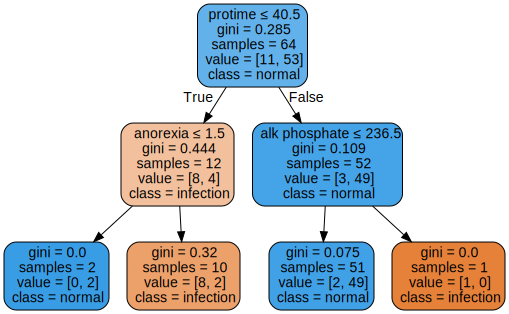

In [16]:
import graphviz

var_names = X_train.columns
class_names = best_decision_tree.classes_

dot_data = tree.export_graphviz(best_decision_tree, feature_names=var_names, \
                                class_names=class_names, filled=True, \
                                rounded=True, special_characters=True)
graph = graphviz.Source(dot_data)
graph

In [17]:
feature_importance_values = best_decision_tree.feature_importances_
feature_importance_values_s = pd.Series(feature_importance_values, index=X_train.columns)
feature_importance_sorted = feature_importance_values_s.sort_values(ascending=False)

feature_importance_sorted

protime            0.647085
anorexia           0.190892
alk phosphate      0.162023
age                0.000000
spiders            0.000000
albumin            0.000000
sgot               0.000000
bilirubin          0.000000
varices            0.000000
ascites            0.000000
spleen palpable    0.000000
sex                0.000000
liver firm         0.000000
liver big          0.000000
mamaise            0.000000
fatigue            0.000000
antivirals         0.000000
steriod            0.000000
histology          0.000000
dtype: float64

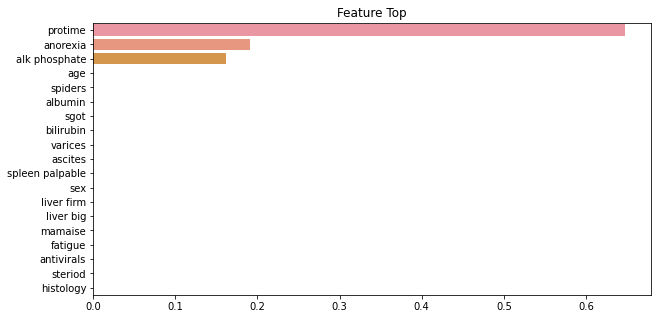

In [18]:
import seaborn as sns

plt.figure(figsize=(10, 5))
plt.title("Feature Top")
sns.barplot(x=feature_importance_sorted, y=feature_importance_sorted.index)
plt.show()

### 실습 4: 최적 트리 모델을 post-pruning하고, post-pruning된 트리 모델 출력(이미지에 변수 이름과 class가 모두 있어야 함)
#### (test accuracy가 높으면서, node개수와 tree depth가 작은 alpha를 찾고, 해당 alpha에 해당하는 트리 모델 출력하는 실습 )

In [19]:
path = best_decision_tree.cost_complexity_pruning_path(X_train, Y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

print("ccp_alphas :", ccp_alphas)
print("impurities :", impurities)

ccp_alphas : [0.         0.02829233 0.03333333 0.11299329]
impurities : [0.11004902 0.13834135 0.17167468 0.28466797]


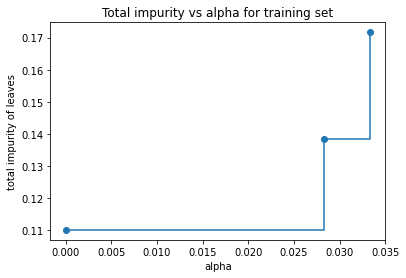

In [20]:
fig, ax = plt.subplots()

ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total impurity vs alpha for training set")
plt.show()

In [21]:
decision_tree_list = list()
for ccp_alpha in ccp_alphas:
    decision_tree_alpha = tree.DecisionTreeClassifier(ccp_alpha=ccp_alpha)
    decision_tree_alpha.fit(X_train, Y_train)
    decision_tree_list.append(decision_tree_alpha)

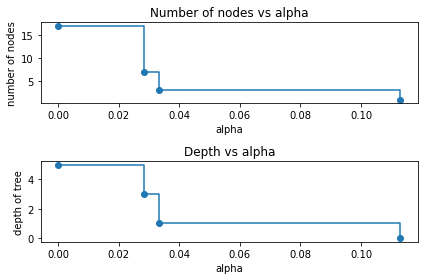

In [22]:
node_counts = [tree_alpha.tree_.node_count for tree_alpha in decision_tree_list]
depth = [tree_alpha.tree_.max_depth for tree_alpha in decision_tree_list]

fig, ax = plt.subplots(nrows=2, ncols=1)

ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")

ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()
plt.show()

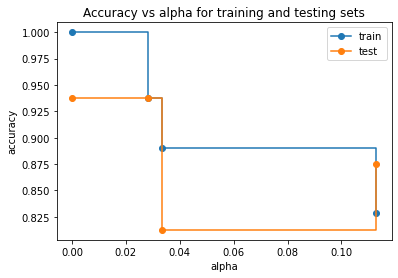

In [23]:
train_scores = [tree_alpha.score(X_train, Y_train) for tree_alpha in decision_tree_list]
test_scores = [tree_alpha.score(X_test, Y_test) for tree_alpha in decision_tree_list]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

Index(['age', 'sex', 'steriod', 'antivirals', 'fatigue', 'mamaise', 'anorexia',
       'liver big', 'liver firm', 'spleen palpable', 'spiders', 'ascites',
       'varices', 'bilirubin', 'alk phosphate', 'sgot', 'albumin', 'protime',
       'histology'],
      dtype='object')
['infection' 'normal']


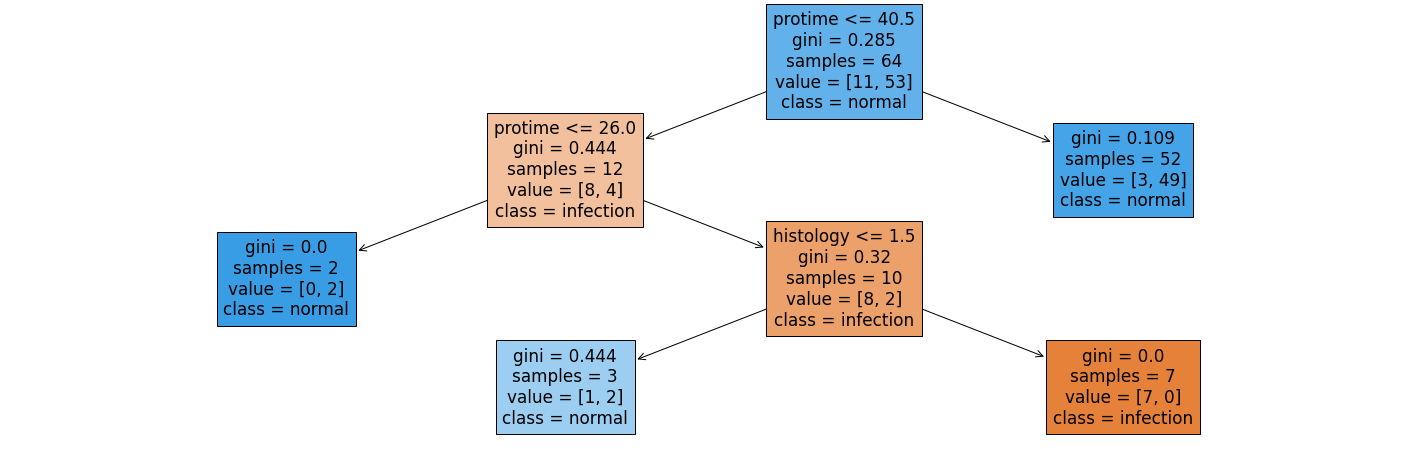

In [24]:
var_names = X_train.columns
print(var_names)

class_names = decision_tree_list[1].classes_
print(class_names)

plt.figure(figsize=(25, 8))
tree.plot_tree(decision_tree_list[1],
               feature_names=var_names,
               class_names=class_names,
               filled=True)
plt.show()